# Data Description

- **Clonesize** The average blueberry clone size in the field
- **Honeybee** Honeybee density in the field
- **Bumbles** Bumblebee density in the field
- **Andrena** Andrena bee density in the field
- **Osmia** Osmia bee density in the field
- **MaxOfUpperTRange** The highest record of the upper band daily air temperature during the bloom season
- **MinOfUpperTRange** The lowest record of the upper band daily air temperature
- **AverageOfUpperTRange** The average of the upper band daily air temperature
- **MaxOfLowerTRange** The highest record of the lower band daily air temperature
- **MinOfLowerTRange** The lowest record of the lower band daily air temperature
- **AverageOfLowerTRange** The average of the lower band daily air temperature
- **RainingDays** The total number of days during the bloom season, each of which has precipitation larger than zero
- **AverageRainingDays** The average of raining days of the entire bloom season

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data

In [2]:
train = pd.read_csv("C:\\Users\\jocel\\Documents\\Kaggle_Blueberry\\train.csv")

# Correlation

In [3]:
# Calculate the correlation coefficients for yield
corr_matrix = train.corr(numeric_only=True)['yield'].drop(['yield', 'id'])

# Convert the Series to a DataFrame
corr_df = corr_matrix.to_frame(name='correlation')

# Sort the correlation coefficients by absolute value in descending order
corr_df_sorted = corr_df.iloc[corr_df['correlation'].abs().argsort()[::-1]]

# Print the sorted correlation coefficients as a DataFrame
print(corr_df_sorted)


                      correlation
fruitset                 0.885967
seeds                    0.868853
fruitmass                0.826481
AverageRainingDays      -0.483870
RainingDays             -0.477191
clonesize               -0.382619
osmia                    0.198264
bumbles                  0.161145
honeybee                -0.118001
andrena                  0.073969
MaxOfUpperTRange        -0.022517
MinOfLowerTRange        -0.022319
MaxOfLowerTRange        -0.022197
AverageOfLowerTRange    -0.022081
AverageOfUpperTRange    -0.021940
MinOfUpperTRange        -0.021929


# Fruit Set

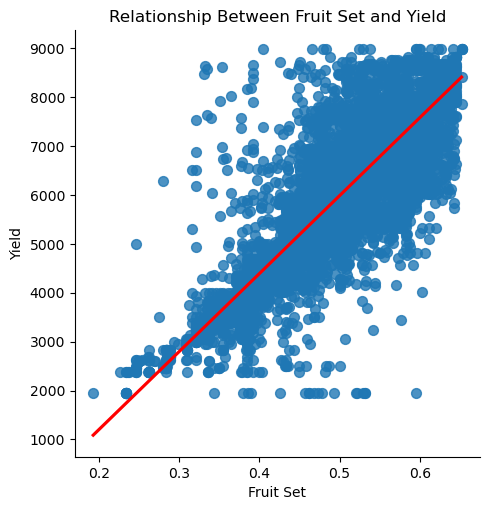

In [4]:
# Create a scatter plot of fruitset vs. yield
sns.lmplot(x='fruitset', y='yield', data=train, line_kws={"color": "red"}, scatter_kws={"s": 50})

# Set axis labels and title
plt.xlabel('Fruit Set')
plt.ylabel('Yield')
plt.title('Relationship Between Fruit Set and Yield')

plt.show()

# Seeds

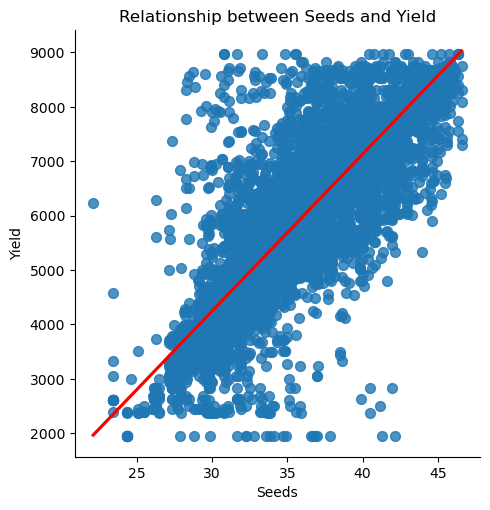

In [5]:
# Create a scatter plot of fruitset vs. yield
sns.lmplot(x='seeds', y='yield', data=train, line_kws={"color": "red"}, scatter_kws={"s": 50})

# Set axis labels and title
plt.xlabel('Seeds')
plt.ylabel('Yield')
plt.title('Relationship between Seeds and Yield')

plt.show()

# Fruit Mass

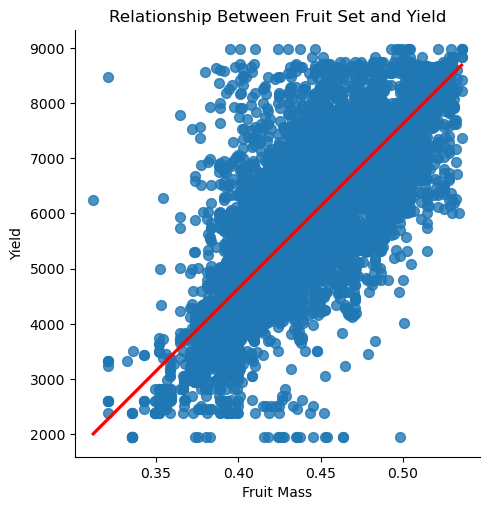

In [6]:
# Create a scatter plot of fruitset vs. yield
sns.lmplot(x='fruitmass', y='yield', data=train, line_kws={"color": "red"}, scatter_kws={"s": 50})

# Set axis labels and title
plt.xlabel('Fruit Mass')
plt.ylabel('Yield')
plt.title('Relationship Between Fruit Set and Yield')

plt.show()

# Raining Days

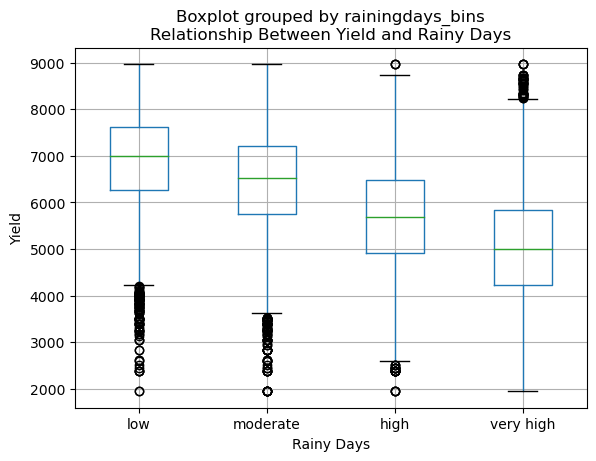

In [7]:
# Bin the averagerainingdays variable into 4 groups
bins = pd.cut(train['AverageRainingDays'], bins=4, labels=['low', 'moderate', 'high', 'very high'])
train['rainingdays_bins'] = bins

# Create a boxplot of yield by rainingdays_bins
fig, ax = plt.subplots()
train.boxplot(column='yield', by='rainingdays_bins', ax=ax)

# Set axis labels and title
ax.set_xlabel('Rainy Days')
ax.set_ylabel('Yield')
ax.set_title('Relationship Between Yield and Rainy Days')

plt.show()

# Colnesize

In [8]:
# Define the bin edges
bins = [0, 15, 30, 45]

# Bin the data
train['clonesize_bins'] = pd.cut(train['clonesize'], bins, labels=['<15', '15-30', '>30'])

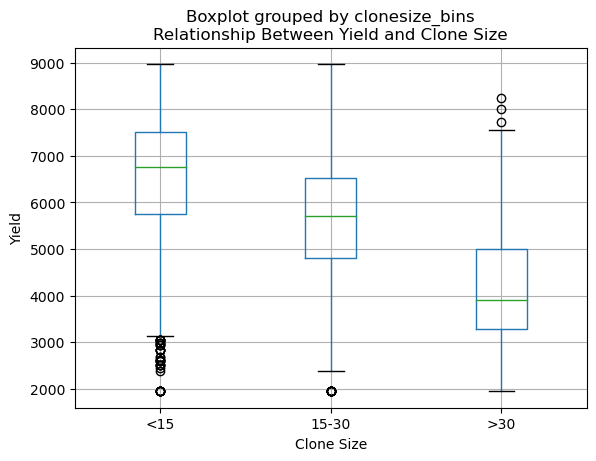

In [9]:
# Create the plot
fig, ax = plt.subplots()
train.boxplot(column='yield', by='clonesize_bins', ax=ax)

# Set axis labels and title
ax.set_xlabel('Clone Size')
ax.set_ylabel('Yield')
ax.set_title('Relationship Between Yield and Clone Size')
plt.show()